<center>
    <h1>Exercise 4: Data Analysis with Python</h1>
    <h2>By Matan Yeshurun and Alon Galperin</h2>
    <h3>Our Task: Loan Prediction Practice Problem</h3>
</center>

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

The company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

## The Data

Variable | Description
----------|--------------
Loan_ID | Unique Loan ID
Gender | Male/ Female
Married | Applicant married (Y/N)
Dependents | Number of dependents
Education | Applicant Education (Graduate/ Under Graduate)
Self_Employed | Self employed (Y/N)
ApplicantIncome | Applicant income
CoapplicantIncome | Coapplicant income
LoanAmount | Loan amount in thousands
Loan_Amount_Term | Term of loan in months
Credit_History | credit history meets guidelines
Property_Area | Urban/ Semi Urban/ Rural
Loan_Status | Loan approved (Y/N)

## Setups

To begin, start iPython interface in Inline Pylab.
This opens up iPython notebook in pylab environment, which has a few useful libraries already imported. Also, you will be able to plot your data inline, which makes this a really good environment for interactive data analysis

In [352]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Following are the libraries we will use during this task:
- numpy
- matplotlib
- pandas

In [403]:
import pandas as pd
import numpy as np
import matplotlib as plt
from copy import deepcopy
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.preprocessing import LabelEncoder

Rest of the imports:

In [354]:
import matplotlib.pyplot as plt

### Now we can read the data:

In [355]:
df_train = pd.read_csv("./data/train.csv") #Reading the dataset in a dataframe using Pandas
df_test = pd.read_csv("./data/test.csv")

We will shuffle the records, since it good fo the predictions algorithms fit process.

In [356]:
from sklearn.utils import shuffle
df_train = shuffle(df_train)
df_test = shuffle(df_test)

df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
83,LP001446,Male,Yes,0,Graduate,No,8449,0,257.0,360.0,1.0,Rural
42,LP001226,Male,Yes,0,Not Graduate,No,1750,2024,90.0,360.0,1.0,Semiurban
111,LP001587,Male,Yes,NaN,Graduate,No,4082,0,93.0,360.0,1.0,Semiurban
304,LP002711,Male,Yes,0,Graduate,No,2600,700,96.0,360.0,1.0,Semiurban
163,LP001911,Female,No,0,Graduate,No,2708,0,65.0,360.0,1.0,Rural


# Data Exploration

### Quick view of the data

Once we have read the dataset, we can have a look at few top rows by using the function head()

In [357]:
df_train.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
116,LP001404,Female,Yes,0,Graduate,No,3167,2283.0,154.0,360.0,1.0,Semiurban,Y
200,LP001674,Male,Yes,1,Not Graduate,No,2600,2500.0,90.0,360.0,1.0,Semiurban,Y
196,LP001666,Male,No,0,Graduate,No,8333,3750.0,187.0,360.0,1.0,Rural,Y
163,LP001570,Male,Yes,2,Graduate,No,4167,1447.0,158.0,360.0,1.0,Rural,Y
22,LP001047,Male,Yes,0,Not Graduate,No,2600,1911.0,116.0,360.0,0.0,Semiurban,N
545,LP002767,Male,Yes,0,Graduate,No,2768,1950.0,155.0,360.0,1.0,Rural,Y
414,LP002335,Female,Yes,0,Not Graduate,No,2149,3237.0,178.0,360.0,0.0,Semiurban,N
361,LP002170,Male,Yes,2,Graduate,No,5000,3667.0,236.0,360.0,1.0,Semiurban,Y
406,LP002308,Male,Yes,0,Not Graduate,No,2167,2400.0,115.0,360.0,1.0,Urban,Y
547,LP002772,Male,No,0,Graduate,No,2526,1783.0,145.0,360.0,1.0,Rural,Y


We can look at summary of numerical fields by using describe() function

In [358]:
df_train.describe() # get the summary of numerical variables

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<strong>We can see that the numrical variables are:</strong>  
- ApplicantIncome  
- CoapplicantIncome  
- LoanAmount  
- Loan_Amount_Term  
- Credit_History

## Distribution Analysis

Now that we are familiar with basic data characteristics, let us study distribution of various variables.  
Let us start with numeric variables – namely <strong>ApplicantIncome and LoanAmount.</strong>

### ApplicantIncome Analysis

Lets start by plotting the histogram of ApplicantIncome using the following commands:

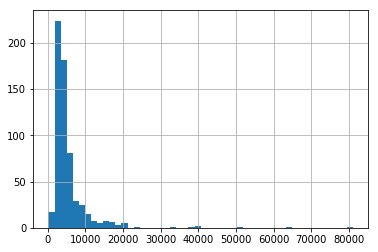

In [359]:
df_train['ApplicantIncome'].hist(bins=50)
plt.show()

Here we observe that there are few extreme values. This is also the reason why 50 bins are required to depict the distribution clearly.  
  
Next, we look at box plots to understand the distributions.  
Box plot can be plotted by:

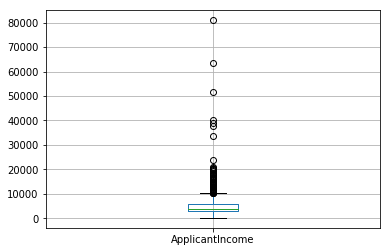

In [360]:
df_train.boxplot(column='ApplicantIncome')

This confirms the presence of a lot of outliers/extreme values.  
This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

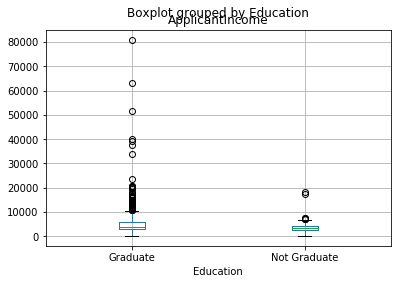

In [361]:
df_train.boxplot(column='ApplicantIncome', by = 'Education')
plt.show()

We can see that there is no substantial different between the mean income of graduate and non-graduates. But there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

Count missing values in **ApplicantIncome**:

In [362]:
df_train['ApplicantIncome'].isnull().ravel().sum()

0

**Missig Values conclusion**:  
We can see that **ApplicantIncome column has 0** missing values

### LoanAmount Analysis

Plot the histogram and boxplot of LoanAmount

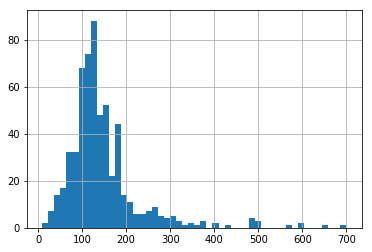

In [363]:
df_train['LoanAmount'].hist(bins=50)

LoanAmount Box plot

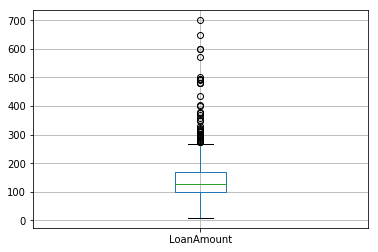

In [364]:
df_train.boxplot(column='LoanAmount')
plt.show()

Again, there are some extreme values.  

Count missing values in **LoanAmount**:

In [365]:
df_train['LoanAmount'].isnull().ravel().sum()

22

**Missig Values conclusion**:  
We can see that **LoanAmount has column has 22** missing values

Conclusions regrading ApplicantIncome and LoanAmount:

Clearly, both ApplicantIncome and LoanAmount require some amount of data munging.  
LoanAmount has missing and well as extreme values values, while ApplicantIncome has a few extreme values, which demand deeper understanding. We will take this up in coming sections.  
  
Variable | Missing Values | Are there Extreme Values?
----------|-------------------------------
ApplicantIncome | 0 | yes
LoanAmount | 22 | yes

## Categorical variable analysis

Check what are the categical columns:

In [366]:
cols = df_train.columns
num_cols = df_train._get_numeric_data().columns
list(set(cols) - set(num_cols))

['Property_Area',
 'Loan_ID',
 'Gender',
 'Married',
 'Self_Employed',
 'Loan_Status',
 'Dependents',
 'Education']

Frequency Table for Credit History:

In [367]:
Credit_History_value_count = df_train['Credit_History'].value_counts(ascending=True)
Credit_History_value_count

0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting loan for each Credit History class:

In [368]:
Credit_History_probability = df_train.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
Credit_History_probability = Credit_History_probability['Loan_Status']
Credit_History_probability

Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64

This can be plotted as a bar chart using the “matplotlib” library with following code:

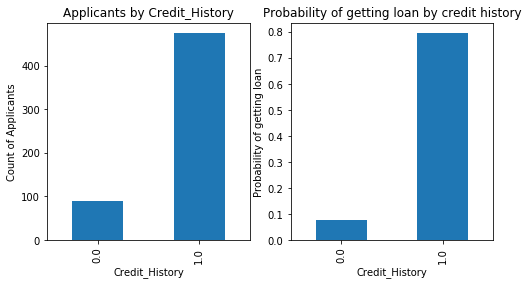

In [369]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
Credit_History_value_count.plot(kind='bar')

ax2 = fig.add_subplot(122)
Credit_History_probability.plot(kind = 'bar')

ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

plt.show()

we want to check if there the gender has any effect on the decision of giving loan

In [370]:
gender_value_count = df_train['Gender'].value_counts(ascending=True)
gender_value_count

Female    112
Male      489
Name: Gender, dtype: int64

In [371]:
gender_value_probability = df_train.pivot_table(values='Loan_Status',index=['Gender'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
gender_value_probability = gender_value_probability['Loan_Status']
gender_value_probability

Gender
Female    0.669643
Male      0.693252
Name: Loan_Status, dtype: float64

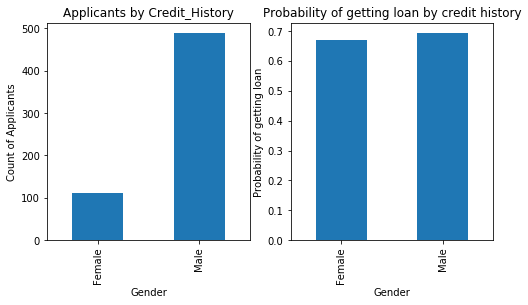

In [372]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Gender')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
gender_value_count.plot(kind='bar')

ax2 = fig.add_subplot(122)
gender_value_probability.plot(kind = 'bar')

ax2.set_xlabel('Gender')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

plt.show()

We can see that there is no relation to the gender. The odds are the same whether.

Finally we want to check if Education status has significant effect:

In [373]:
education_value_count = df_train['Education'].value_counts(ascending=True)
education_value_count

Not Graduate    134
Graduate        480
Name: Education, dtype: int64

In [374]:
education_value_probability = df_train.pivot_table(values='Loan_Status',index=['Education'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
education_value_probability = education_value_probability['Loan_Status']
education_value_probability

Education
Graduate        0.708333
Not Graduate    0.611940
Name: Loan_Status, dtype: float64

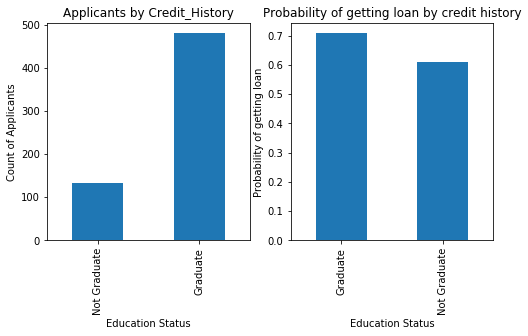

In [375]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Education Status')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
education_value_count.plot(kind='bar')

ax2 = fig.add_subplot(122)
education_value_probability.plot(kind = 'bar')

ax2.set_xlabel('Education Status')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

plt.show()

We can see that the significance is rather small

## Data Munging - Fill Missing Values and  Smooth Extreme Values

In this section we will deal with the extreme values and filling of missing values.  
  
In addition to these problems with numerical fields, we should also look at the non-numerical fields i.e. Gender, Property_Area, Married, Education and Dependents to see, if they contain any useful information.

For this section we will combine the train and test sets to one combined dataset.  
At the end of this section we will split the data again to same train and test records

In [376]:
train_rows = len(df_train) # this variable will tell us where the train records are ending, and the test records are starting

total_data = df_train.append(df_test)

### Check missing values in the dataset

Motivation:  
Let us look at missing values in all the variables because most of the models don’t work with missing data and even if they do, imputing them helps more often than not.  
So, let us check the number of nulls / NaNs in the dataset.

<h1 style="color:blue">Comment:</h1>
<p>
Regarding filling the missing values in categorical attributs:  
We wrote a complex method for filling missing values using knn-algorithm.  
But when we really checked the destribution of the missing values in every column -  
we saw that in all categorical attributes there is an really segnificant majority for one of the values.  
<br />
In conclusion we decided not to use the knn function and to use 'Mode' to fill the missing values, in order to keep things simple.  
We also deleted the knn function from the code in order to make it more readable.  
<br/>
Link to the knn function we wrote, stored on seperate file:  
<a href="https://github.com/matan-yes/ex4/blob/master/knn%20fill%20missing%20values.ipynb">Link to knn algorithm</a>
</p>

**Check counts of missing values:**

In [377]:
total_data.apply(lambda x: sum(x.isnull()),axis=0)

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
dtype: int64

Note: We consider 0 in LoanAmount as missing value.  
Now we check how many 0 there are in LoanAmount:

In [378]:
if 0 in total_data['LoanAmount'].value_counts():
    print('number of records with 0 in Loan Amount: %d' %total_data['LoanAmount'].value_counts()[0])
else:
    print('no records with 0 in Loan Amount')

no records with 0 in Loan Amount


### How to fill missing values in LoanAmount?

We want to fill the missing data in LoanAmount following the next hypothesis:  
A key hypothesis is that whether a person is educated or self-employed can combine to give a good estimate of loan amount.  
  
   
But first, we have to ensure that each of Self_Employed and Education variables should not have a missing values.

As we say earlier, Self_Employed has some missing values. Let’s look at the frequency table:

In [379]:
total_data['Self_Employed'].value_counts()

No     807
Yes    119
Name: Self_Employed, dtype: int64

Since ~87% values are “No”, it is safe to impute the missing values as “No” as there is a high probability of success. This can be done using the following code:

In [380]:
total_data['Self_Employed'].fillna('No',inplace=True)

We saw previously that we don't have missing values in  Education.

Now, we will create a Pivot table, which provides us median values for all the groups of unique values of Self_Employed and Education features.  
Next, we define a function, which returns the values of these cells and apply it to fill the missing values of loan amount:

In [381]:
table = total_data.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
table

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,117.0
Yes,150.0,130.0


Define function to return value of this pivot_table:

In [382]:
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]

Replace missing values in LoanAmount, using apply to bind function to missing values:

In [383]:
total_data['LoanAmount'].fillna(total_data[total_data['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

Now we filled the missing data on LoanAmount column

### Remove Nulls

Impute the missing values for Loan_Amount_Term, Gender, Married, Dependents, Credit_History

#### Fill Loan_Amount_Term  
  
Check values distribution (print only the top 4 values):

In [384]:
total_data['Loan_Amount_Term'].value_counts().head(4)

360.0    823
180.0     66
480.0     23
300.0     20
Name: Loan_Amount_Term, dtype: int64

We can see that the big majority is for 360, there for we fill the missing data with that value of 360

In [385]:
total_data['Loan_Amount_Term'].fillna(360, inplace=True)

#### Fill Gender  
  
  
Check values distribution:

In [386]:
total_data['Gender'].value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

We can see that the 82% of the records are from males.
We will fill the missing values with 'Male'

In [387]:
total_data['Gender'].fillna('Male', inplace=True)

#### Fill Married  
  
  
Check values distribution:

In [388]:
total_data['Married'].value_counts()

Yes    631
No     347
Name: Married, dtype: int64

We will fill this value with the most common value, which is Yes

In [389]:
total_data['Married'].fillna('Yes', inplace=True)

#### Fill Dependents  
  
Check values distribution:

In [390]:
total_data['Dependents'].value_counts()

0     545
2     160
1     160
3+     91
Name: Dependents, dtype: int64

We can see that there are more 0 than other categories in a segnificant precentage

In [391]:
total_data['Dependents'].fillna(0, inplace=True)

#### Fill Credit_History  
  
Check values distribution:

In [392]:
total_data['Credit_History'].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

We can see that there are more 1 than 0 in a segnificant precentage

In [393]:
total_data['Credit_History'].fillna(1, inplace=True)

Let's check if there are any more missing values in the dataset.  
Note: The missing values on Load_Status are from test records

In [394]:
total_data.apply(lambda x: sum(x.isnull()),axis=0)

ApplicantIncome        0
CoapplicantIncome      0
Credit_History         0
Dependents             0
Education              0
Gender                 0
LoanAmount             0
Loan_Amount_Term       0
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed          0
dtype: int64

## How to treat for extreme values?
### Columns to be treated: ApplicantIncome and LoanAmount

Let’s analyze LoanAmount first. Since the extreme values are practically possible, i.e. some people might apply for high value loans due to specific needs. So instead of treating them as outliers, let’s try a **log transformation** to nullify their effect:

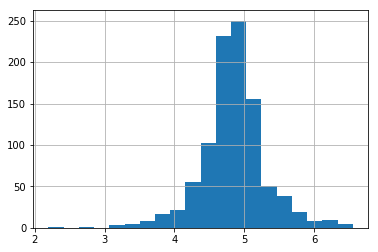

In [395]:
total_data['LoanAmount_log'] = np.log(total_data['LoanAmount'])
total_data['LoanAmount_log'].hist(bins=20)

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

Coming to ApplicantIncome. One intuition can be that some applicants have lower income but strong support Co-applicants. So it might be a good idea to combine both incomes as total income and take a log transformation of the same.

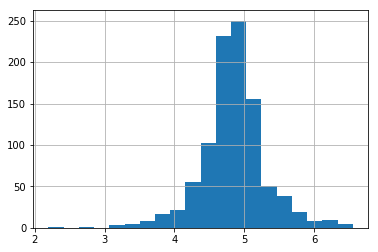

In [396]:
total_data['TotalIncome'] = total_data['ApplicantIncome'] + total_data['CoapplicantIncome']
total_data['TotalIncome_log'] = np.log(total_data['TotalIncome'])
total_data['LoanAmount_log'].hist(bins=20) 

Now we see that the distribution is much better than before. 

### Split the dataset to test and train sets:

In [397]:
df_train = total_data[:train_rows]
df_test = total_data[train_rows:]

### Remove LoanID column
We will remove LoanID from test and train sets to prevent overfitting

In [398]:
loan_id_backup_testset = deepcopy(df_test['Loan_ID']) # back up the loan IDs.

df_train.drop('Loan_ID',axis=1, inplace = True)
df_test.drop('Loan_ID',axis=1, inplace = True)

# Building a Predictive Model

After we have made the data useful for modeling, let’s now look at the python code to create a predictive model on our data set.  
Skicit-Learn (sklearn) is the most commonly used library in Python for this purpose and we will follow the trail.

Since, sklearn requires all inputs to be numeric, we should convert all our categorical variables into numeric by encoding the categories. This can be done using the following code:

In [409]:
def get_categorical_cols(dataframe):
    cols = dataframe.columns
    num_cols = dataframe._get_numeric_data().columns
    categories = (set(cols) - set(num_cols))
    return categories

categorical_cols = get_categorical_cols(df_train)

le = LabelEncoder()
for i in categorical_cols:
    df_train[i] = le.fit_transform(df_train[i].astype(str))
    df_test[i] = le.fit_transform(df_test[i].astype(str))
    
# see how the dataset look now
print (df_train.head(5))

     ApplicantIncome  CoapplicantIncome  Credit_History  Dependents  \
116             3167             2283.0             1.0           0   
200             2600             2500.0             1.0           1   
196             8333             3750.0             1.0           0   
163             4167             1447.0             1.0           2   
22              2600             1911.0             0.0           0   
545             2768             1950.0             1.0           0   
414             2149             3237.0             0.0           0   
361             5000             3667.0             1.0           2   
406             2167             2400.0             1.0           0   
547             2526             1783.0             1.0           0   
435            10047                0.0             1.0           0   
388             2333             2417.0             1.0           0   
202             3992                0.0             1.0           3   
319   